In [2]:
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable

   SEQN  ELIGSTAT  MORTSTAT  UCOD_LEADING  DIABETES  HYPERTEN  PERMTH_INT  \
0     1         2       NaN           NaN       NaN       NaN         NaN   
1     2         1       1.0           6.0       0.0       0.0       177.0   
2     3         2       NaN           NaN       NaN       NaN         NaN   
3     4         2       NaN           NaN       NaN       NaN         NaN   
4     5         1       0.0           NaN       NaN       NaN       244.0   

   PERMTH_EXM  
0         NaN  
1       177.0  
2         NaN  
3         NaN  
4       244.0  
   SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDAGEEX  \
0   1.0       1.0       2.0       2.0       2.0       2.0      29.0      31.0   
1   2.0       1.0       2.0       2.0       1.0      77.0     926.0     926.0   
2   3.0       1.0       2.0       1.0       2.0      10.0     125.0     126.0   
3   4.0       1.0       2.0       2.0       1.0       1.0      22.0      23.0   
4   5.0       1.0       2.0       2.

1. ELIGSTAT - Used to determine eligibility for mortality status. 1 is used for individuals who are eligible for mortality linkage, a 2 is an individual under 18 and not eligible for public release, and a 3 is used for an individual without sufficient data for a mortality linkage.
2. MORTSTAT - Is used to assign a mortality status, a 0 is a presumed living individual and a 1 is a presumed dead individual.
3. PERMTH_INT - Used for months since date of interview to death or end of mortality period.    
4. RIDAGEEX - Age in months at the date of examination for people under 85.

In [4]:
df.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR',
       'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1', 'RIDRETH2',
       ...
       'WTIREP50', 'WTIREP51', 'WTIREP52', 'ELIGSTAT', 'MORTSTAT',
       'UCOD_LEADING', 'DIABETES', 'HYPERTEN', 'PERMTH_INT', 'PERMTH_EXM'],
      dtype='object', length=151)

In [5]:
pd.set_option('display.max_columns', None)
print(df.columns.tolist())

['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1', 'RIDRETH2', 'DMQMILIT', 'DMDBORN', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDEDUC', 'DMDSCHOL', 'DMDMARTL', 'DMDHHSIZ', 'INDHHINC', 'INDFMINC', 'INDFMPIR', 'RIDEXPRG', 'RIDPREG', 'DMDHRGND', 'DMDHRAGE', 'DMDHRBRN', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR', 'WTINT4YR', 'WTMEC2YR', 'WTMEC4YR', 'SDMVPSU', 'SDMVSTRA', 'SDJ1REPN', 'DMAETHN', 'DMARACE', 'WTMREP01', 'WTMREP02', 'WTMREP03', 'WTMREP04', 'WTMREP05', 'WTMREP06', 'WTMREP07', 'WTMREP08', 'WTMREP09', 'WTMREP10', 'WTMREP11', 'WTMREP12', 'WTMREP13', 'WTMREP14', 'WTMREP15', 'WTMREP16', 'WTMREP17', 'WTMREP18', 'WTMREP19', 'WTMREP20', 'WTMREP21', 'WTMREP22', 'WTMREP23', 'WTMREP24', 'WTMREP25', 'WTMREP26', 'WTMREP27', 'WTMREP28', 'WTMREP29', 'WTMREP30', 'WTMREP31', 'WTMREP32', 'WTMREP33', 'WTMREP34', 'WTMREP35', 'WTMREP36', 'WTMREP37', 'WTMREP38', 'WTMREP39', 'WTMREP40', 'WTMREP41', 'WTMREP42', 'WTMREP43', 'WTMREP44', '

In [6]:
eda_vars = [
    "MORTSTAT",
    "PERMTH_INT",
    "RIDAGEYR",
    "DMDMARTL",
    "INDFMPIR",
    "DMDHHSIZ",
    "DMDBORN"
]

# add whichever income variable you have
if "INDHHINC" in df.columns:
    eda_vars.append("INDHHINC")
if "INDFMINC" in df.columns:
    eda_vars.append("INDFMINC")

df_eda = df[eda_vars].copy()
df_eda.head()

,MORTSTAT,PERMTH_INT,RIDAGEYR,DMDMARTL,INDFMPIR,DMDHHSIZ,DMDBORN,INDHHINC,INDFMINC
0,NaN,NaN,2.0,NaN,0.86,3.0,1.0,3.0,3.0
1,1.0,177.0,77.0,NaN,5.00,1.0,1.0,8.0,8.0
2,NaN,NaN,10.0,NaN,1.47,4.0,3.0,6.0,6.0
3,NaN,NaN,1.0,NaN,0.57,7.0,1.0,3.0,3.0
4,0.0,244.0,49.0,1.0,5.00,3.0,1.0,11.0,11.0


Missing values:
            missing_count  missing_percent
MORTSTAT             4520            45.36
PERMTH_INT           4520            45.36
DMDMARTL             3902            39.16
INDHHINC             2913            29.23
INDFMINC             1904            19.11
INDFMPIR             1483            14.88
DMDBORN                13             0.13
RIDAGEYR                0             0.00
DMDHHSIZ                0             0.00

Summary statistics:
           RIDAGEYR      INDFMPIR     DMDHHSIZ   PERMTH_INT     INDHHINC  \
count  9.965000e+03  8.482000e+03  9965.000000  5445.000000  7052.000000   
mean   2.972885e+01  2.175533e+00     3.921325   202.314601     6.325014   
std    2.483034e+01  1.581478e+00     1.776907    67.137767     3.414807   
min    5.397605e-79  5.397605e-79     1.000000     0.000000     1.000000   
25%    1.100000e+01  8.800000e-01     2.000000   194.000000     3.000000   
50%    1.900000e+01  1.700000e+00     4.000000   235.000000     6.000000   
7

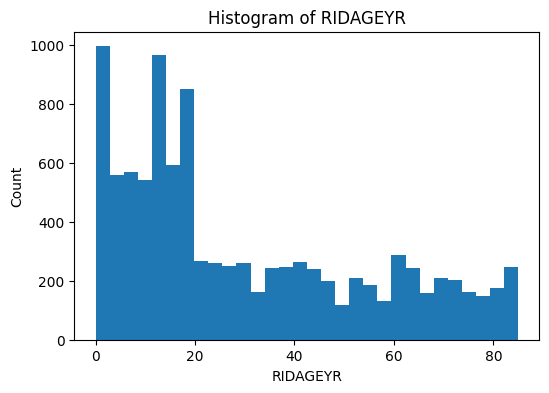

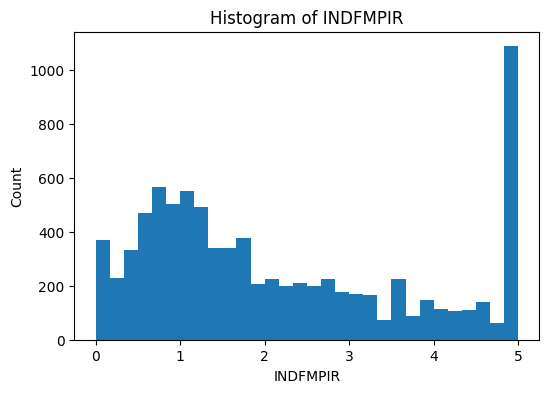

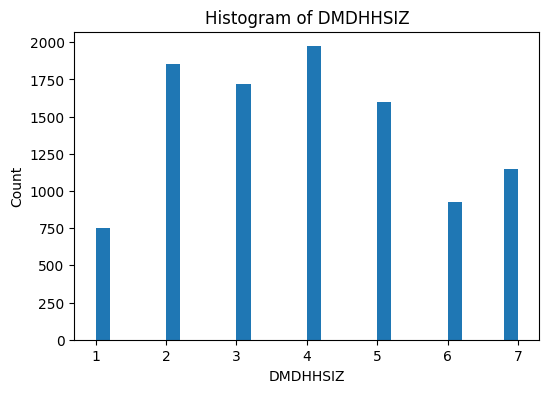

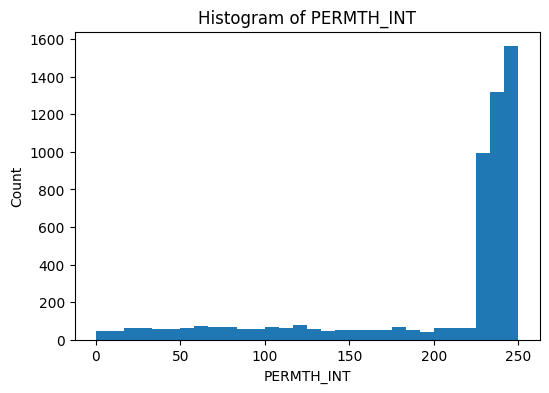

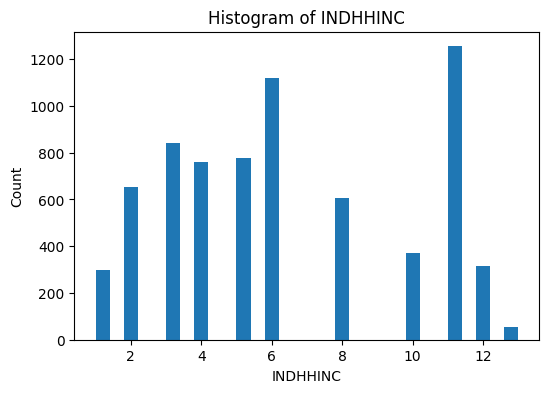

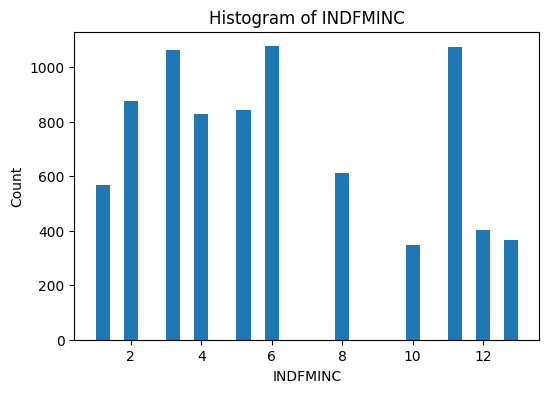

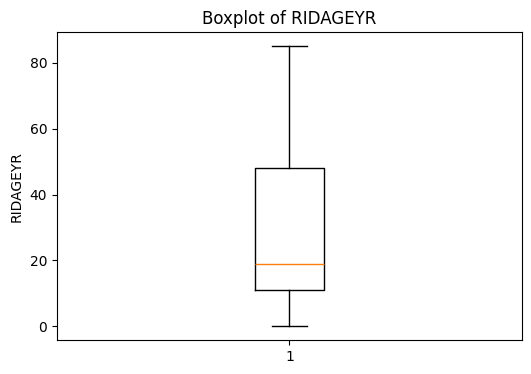

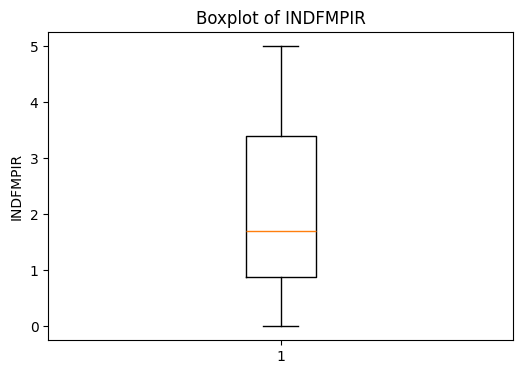

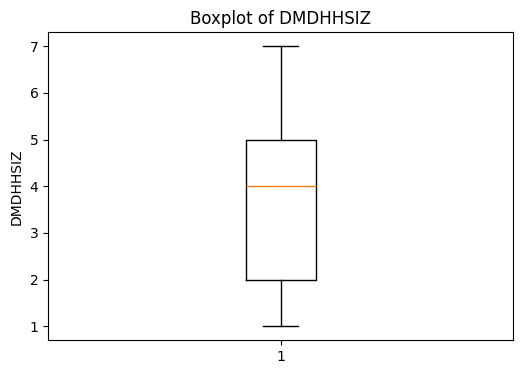

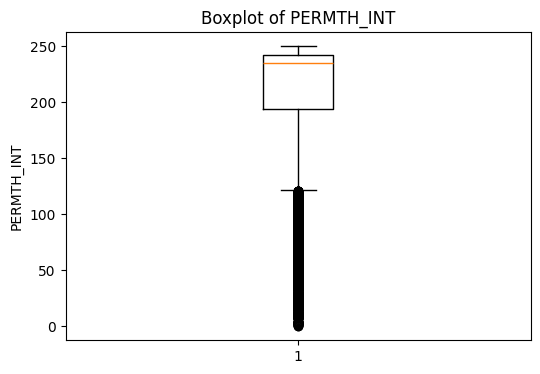

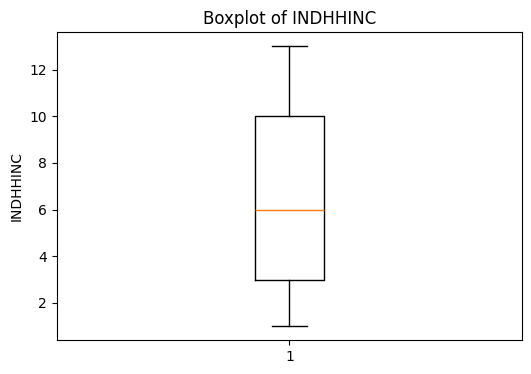

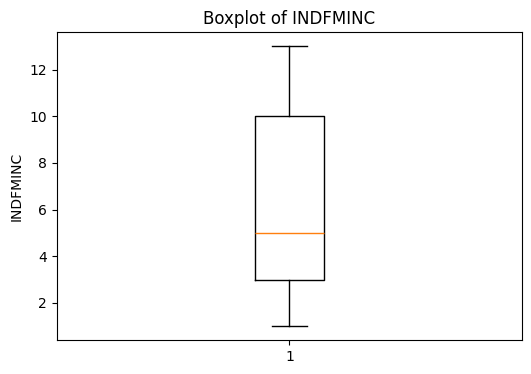


Correlation matrix:
            RIDAGEYR  INDFMPIR  DMDHHSIZ  PERMTH_INT  INDHHINC  INDFMINC  \
RIDAGEYR    1.000000  0.157175 -0.519427   -0.618033 -0.044995  0.021109   
INDFMPIR    0.157175  1.000000 -0.267591    0.109559  0.820166  0.938938   
DMDHHSIZ   -0.519427 -0.267591  1.000000    0.274871  0.159627 -0.022278   
PERMTH_INT -0.618033  0.109559  0.274871    1.000000  0.199229  0.119803   
INDHHINC   -0.044995  0.820166  0.159627    0.199229  1.000000  0.862970   
INDFMINC    0.021109  0.938938 -0.022278    0.119803  0.862970  1.000000   
MORTSTAT    0.672626 -0.096903 -0.316075   -0.823795 -0.210452 -0.125590   

            MORTSTAT  
RIDAGEYR    0.672626  
INDFMPIR   -0.096903  
DMDHHSIZ   -0.316075  
PERMTH_INT -0.823795  
INDHHINC   -0.210452  
INDFMINC   -0.125590  
MORTSTAT    1.000000  


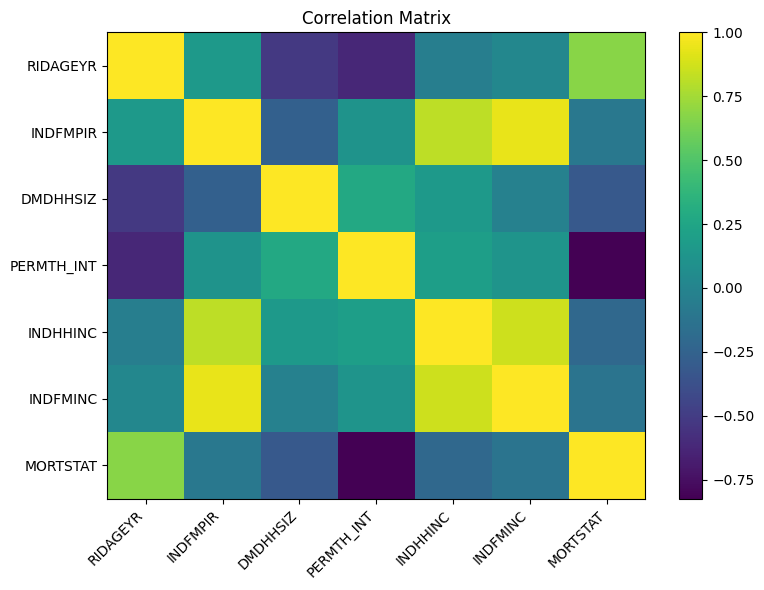


Marital status vs mortality:
MORTSTAT   0.0   1.0   All
DMDMARTL                  
1.0       1657   813  2470
2.0        109   366   475
3.0        238   138   376
4.0        139    38   177
5.0       1054   107  1161
6.0        185    36   221
All       3382  1498  4880
MORTSTAT       0.0       1.0
DMDMARTL                    
1.0       0.670850  0.329150
2.0       0.229474  0.770526
3.0       0.632979  0.367021
4.0       0.785311  0.214689
5.0       0.907838  0.092162
6.0       0.837104  0.162896

Country of birth vs mortality:
MORTSTAT   0.0   1.0   All
DMDBORN                   
1.0       2630  1340  3970
2.0        678   180   858
3.0        457   149   606
All       3765  1669  5434
MORTSTAT       0.0       1.0
DMDBORN                     
1.0       0.662469  0.337531
2.0       0.790210  0.209790
3.0       0.754125  0.245875

Means by mortality status:
           RIDAGEYR  INDFMPIR  DMDHHSIZ  PERMTH_INT  INDHHINC  INDFMINC
MORTSTAT                                                

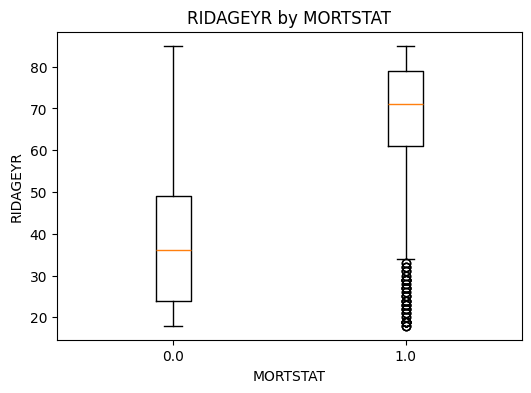

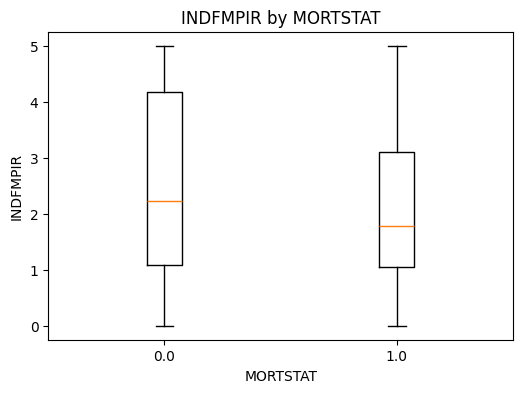

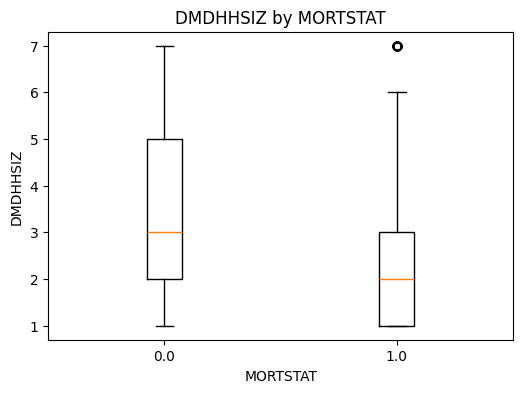

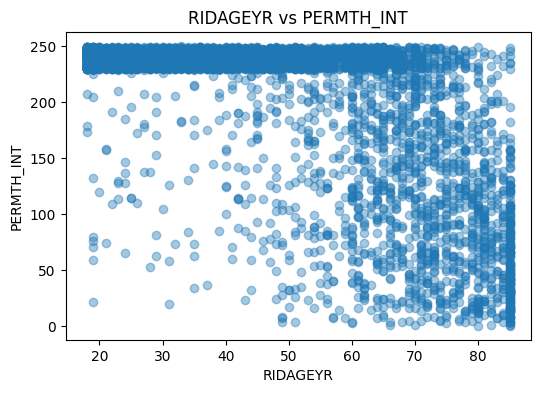

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

eda_vars = [
    "MORTSTAT",
    "PERMTH_INT",
    "RIDAGEYR",
    "DMDMARTL",
    "INDFMPIR",
    "DMDHHSIZ",
    "DMDBORN"
]

if "INDHHINC" in df.columns:
    eda_vars.append("INDHHINC")
if "INDFMINC" in df.columns:
    eda_vars.append("INDFMINC")

df_eda = df[eda_vars].copy()

missing_codes = [7, 9, 77, 99]
for col in ["DMDMARTL", "DMDBORN", "INDHHINC", "INDFMINC"]:
    if col in df_eda.columns:
        df_eda[col] = df_eda[col].replace(missing_codes, np.nan)

missing_summary = pd.DataFrame({
    "missing_count": df_eda.isna().sum(),
    "missing_percent": (df_eda.isna().mean() * 100).round(2)
}).sort_values("missing_percent", ascending=False)

print("Missing values:")
print(missing_summary)

num_vars = ["RIDAGEYR", "INDFMPIR", "DMDHHSIZ", "PERMTH_INT"]
if "INDHHINC" in df_eda.columns:
    num_vars.append("INDHHINC")
if "INDFMINC" in df_eda.columns:
    num_vars.append("INDFMINC")

print("\nSummary statistics:")
print(df_eda[num_vars].describe())

for col in ["MORTSTAT", "DMDMARTL", "DMDBORN"]:
    print(f"\nValue counts for {col}:")
    print(df_eda[col].value_counts(dropna=False))

for col in num_vars:
    plt.figure(figsize=(6,4))
    plt.hist(df_eda[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

for col in num_vars:
    plt.figure(figsize=(6,4))
    plt.boxplot(df_eda[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

corr = df_eda[num_vars + ["MORTSTAT"]].corr(numeric_only=True)
print("\nCorrelation matrix:")
print(corr)

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Matrix")
plt.colorbar()
plt.tight_layout()
plt.show()

print("\nMarital status vs mortality:")
print(pd.crosstab(df_eda["DMDMARTL"], df_eda["MORTSTAT"], margins=True))
print(pd.crosstab(df_eda["DMDMARTL"], df_eda["MORTSTAT"], normalize="index"))

print("\nCountry of birth vs mortality:")
print(pd.crosstab(df_eda["DMDBORN"], df_eda["MORTSTAT"], margins=True))
print(pd.crosstab(df_eda["DMDBORN"], df_eda["MORTSTAT"], normalize="index"))

group_vars = ["RIDAGEYR", "INDFMPIR", "DMDHHSIZ", "PERMTH_INT"]
if "INDHHINC" in df_eda.columns:
    group_vars.append("INDHHINC")
if "INDFMINC" in df_eda.columns:
    group_vars.append("INDFMINC")

print("\nMeans by mortality status:")
print(df_eda.groupby("MORTSTAT")[group_vars].mean())

for col in ["RIDAGEYR", "INDFMPIR", "DMDHHSIZ"]:
    plt.figure(figsize=(6,4))
    groups = [df_eda[df_eda["MORTSTAT"] == m][col].dropna() for m in sorted(df_eda["MORTSTAT"].dropna().unique())]
    plt.boxplot(groups, tick_labels=sorted(df_eda["MORTSTAT"].dropna().unique()))
    plt.title(f"{col} by MORTSTAT")
    plt.xlabel("MORTSTAT")
    plt.ylabel(col)
    plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df_eda["RIDAGEYR"], df_eda["PERMTH_INT"], alpha=0.4)
plt.title("RIDAGEYR vs PERMTH_INT")
plt.xlabel("RIDAGEYR")
plt.ylabel("PERMTH_INT")
plt.show()

For this exploratory data analysis, I focused on RIDAGEYR (age), DMDMARTL (marital status), INDHHINC / INDFMINC (household/family income), INDFMPIR (poverty-income ratio), DMDHHSIZ (household size), and DMDBORN (country of birth), along with the outcomes MORTSTAT and PERMTH_INT. These variables were selected because age, income, and household characteristics to me felt like significant factors in ones life and I believe that they may play a role in morality.

The histogram of RIDAGEYR shows a wide age range, with more observations at younger ages. INDFMPIR appears somewhat right-skewed, with many observations at lower values and a noticeable spike near 5.0. DMDHHSIZ is discrete, with most households containing between 2 and 5 people. PERMTH_INT is heavily skewed, with many values near the maximum follow-up period, indicating that many participants were still alive at the end of follow-up. The income variables INDHHINC and INDFMINC are coded categories, so they appear in clusters rather than as smooth continuous distributions.

The boxplots generally show that the demographic predictors do not have severe outliers, although PERMTH_INT has many low-end outliers corresponding to participants who died earlier. The correlation matrix shows that age is strongly positively associated with mortality (MORTSTAT = 0.67) and negatively associated with follow-up time (PERMTH_INT = -0.62). PERMTH_INT is also strongly negatively correlated with MORTSTAT (-0.82), which is expected because people who died had shorter follow-up times. The income variables are highly correlated with each other, especially INDFMPIR with INDHHINC and INDFMINC, so they capture similar socioeconomic information.

The contingency tables suggest that marital status and country of birth may also be related to mortality, although these relationships are weaker than age. The grouped summaries by mortality status show that participants who were deceased were much older on average, had lower poverty-income ratios, lower household/family income, and smaller household sizes. The boxplots by mortality status support these findings, especially for age, where the deceased group is clearly older.

Overall, the EDA suggests that age is the strongest predictor of mortality which is to be expected in this dataset however can be a good baseline. Socioeconomic variables such as poverty-income ratio and income also appear relevant, while household size and marital status may provide additional useful information but often not as impactful. These results suggest that age should be a key variable in later modeling of course, with selected demographic and socioeconomic variables included as additional and possibly outside predictors.